<a href="https://colab.research.google.com/github/AfRi99/Yoga/blob/main/keypoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataset_path = '/content/drive/MyDrive/yoga_postures'


In [5]:
!pip install mediapipe opencv-python-headless numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 45.5 MB/s eta 0:00:00


In [35]:
import os

base_dir = "/content/YogaPoseDetection"
os.makedirs(f"{base_dir}/data/Processed", exist_ok=True)
os.makedirs(f"{base_dir}/logs", exist_ok=True)
os.makedirs(f"{base_dir}/results", exist_ok=True)

print("Directory structure created.")


Directory structure created.


In [36]:
import os

def traverse_dataset(dataset_path):
    for root, dirs, files in os.walk(dataset_path):
        print(f"Directory: {root}")
        for file in files:
            print(f"  - File: {file}")

dataset_path = "/content/drive/MyDrive/yoga_postures"
traverse_dataset(dataset_path)


Directory: /content/drive/MyDrive/yoga_postures
Directory: /content/drive/MyDrive/yoga_postures/Anantasana
Directory: /content/drive/MyDrive/yoga_postures/Anantasana/Anantasana Right Steps
Directory: /content/drive/MyDrive/yoga_postures/Anantasana/Anantasana Right Steps/Anantasana Right Step 1
  - File: 20230317_072735.jpg
  - File: 20230317_072740.jpg
  - File: 20230317_072743.jpg
  - File: 20230317_072736.jpg
  - File: 20230317_072745(0).jpg
  - File: 20230317_072742.jpg
  - File: 20230317_072745.jpg
  - File: 20230317_072748.jpg
  - File: 20230317_072737.jpg
  - File: 20230317_072746.jpg
  - File: 20230317_072738.jpg
  - File: 20230317_072744(0).jpg
  - File: 20230317_072751.jpg
  - File: 20230317_072747.jpg
  - File: 20230317_072741.jpg
  - File: 20230317_072744.jpg
  - File: 20230317_072737(0).jpg
  - File: 20230317_072740(0).jpg
  - File: 20230317_072749.jpg
  - File: 20230317_072750.jpg
  - File: 20230317_072759.jpg
  - File: 20230317_072758.jpg
  - File: 20230317_072752.jpg
  -

In [37]:
import mediapipe as mp
import cv2

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

def detect_keypoints(image_path, save_path):
    # Read image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect key points
    results = pose.process(image_rgb)

    # Draw key points on the image
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        cv2.imwrite(save_path, image)  # Save the processed image
        return results.pose_landmarks.landmark
    return None


In [38]:
import os
import json

def save_keypoints(keypoints, output_path):
    # Ensure the directory exists
    output_dir = os.path.dirname(output_path)
    os.makedirs(output_dir, exist_ok=True)

    # Save keypoints to JSON
    data = [{"x": kp.x, "y": kp.y, "z": kp.z, "visibility": kp.visibility} for kp in keypoints]
    with open(output_path, 'w') as f:
        json.dump(data, f)




In [39]:
import os

# Paths
dataset_path = '/content/drive/MyDrive/yoga_postures'  # Correct dataset path
processed_path = '/content/YogaPoseDetection/data/Processed'  # Path for processed images
results_path = '/content/YogaPoseDetection/results'  # Path for results (JSON files)

# Ensure the processed and results directories exist
os.makedirs(processed_path, exist_ok=True)
os.makedirs(results_path, exist_ok=True)

# Iterate through the dataset and process images
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".jpg"):
            full_path = os.path.join(root, file)  # Original image path
            save_image_path = os.path.join(processed_path, file)  # Path to save processed image

            # Key point detection (Assuming detect_keypoints is implemented)
            keypoints = detect_keypoints(full_path, save_image_path)

            if keypoints:  # If keypoints are successfully detected
                # Construct JSON file name
                pose_name = os.path.basename(os.path.dirname(root))  # Pose folder name
                step_name = os.path.basename(root)  # Step folder name
                json_name = f"{pose_name}_{step_name}_{file.split('.')[0]}.json"

                # Path to save the JSON file
                json_path = os.path.join(results_path, json_name)

                # Save keypoints to JSON (Assuming save_keypoints is implemented)
                save_keypoints(keypoints, json_path)

                print(f"Processed and saved keypoints: {json_path}")
            else:
                print(f"Keypoint detection failed for: {full_path}")


Processed and saved keypoints: /content/YogaPoseDetection/results/Anantasana Right Steps_Anantasana Right Step 1_20230317_072735.json
Keypoint detection failed for: /content/drive/MyDrive/yoga_postures/Anantasana/Anantasana Right Steps/Anantasana Right Step 1/20230317_072740.jpg
Processed and saved keypoints: /content/YogaPoseDetection/results/Anantasana Right Steps_Anantasana Right Step 1_20230317_072743.json
Processed and saved keypoints: /content/YogaPoseDetection/results/Anantasana Right Steps_Anantasana Right Step 1_20230317_072736.json
Processed and saved keypoints: /content/YogaPoseDetection/results/Anantasana Right Steps_Anantasana Right Step 1_20230317_072745(0).json
Processed and saved keypoints: /content/YogaPoseDetection/results/Anantasana Right Steps_Anantasana Right Step 1_20230317_072742.json
Processed and saved keypoints: /content/YogaPoseDetection/results/Anantasana Right Steps_Anantasana Right Step 1_20230317_072745.json
Processed and saved keypoints: /content/YogaPos

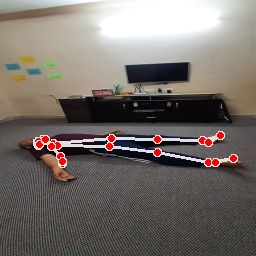

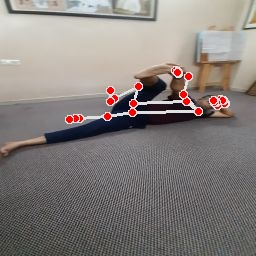

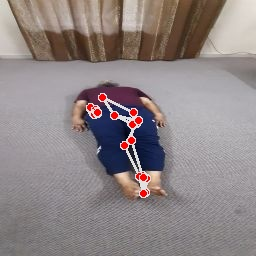

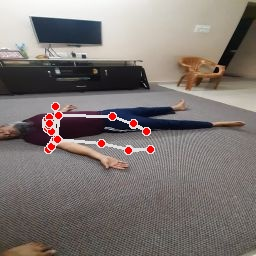

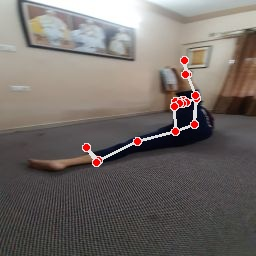

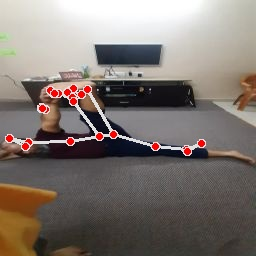

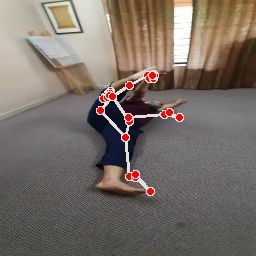

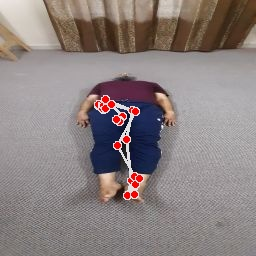

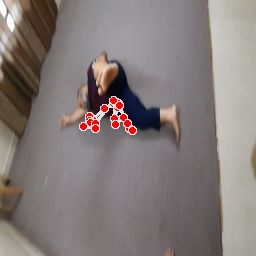

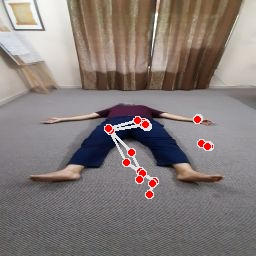

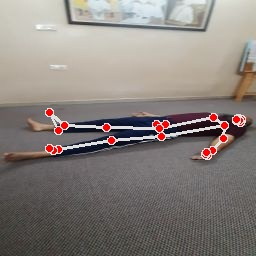

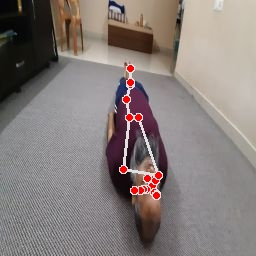

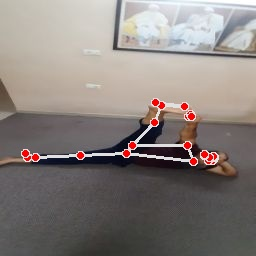

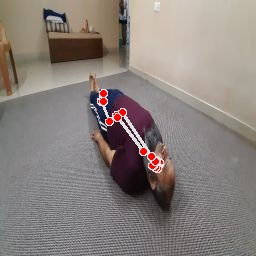

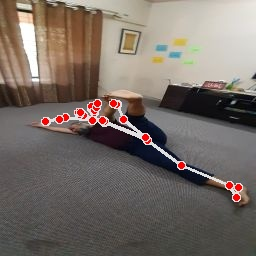

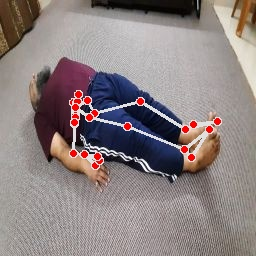

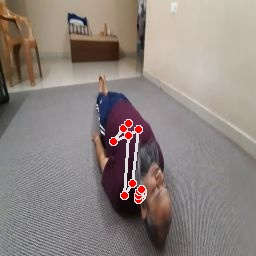

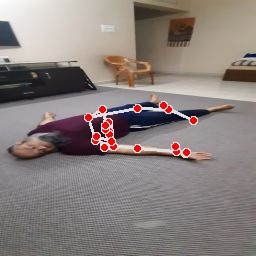

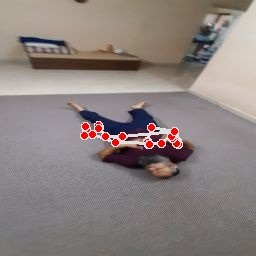

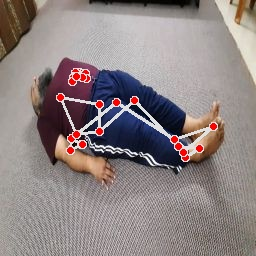

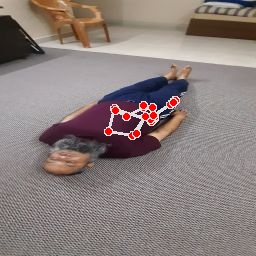

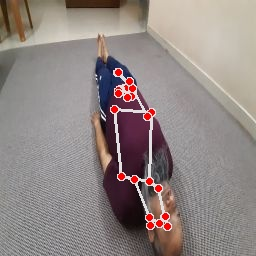

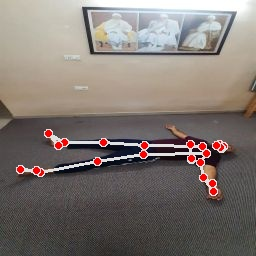

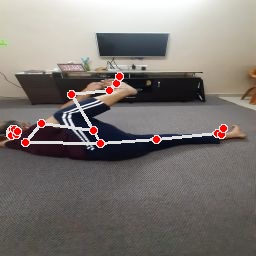

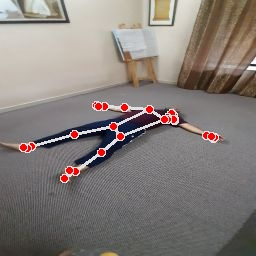

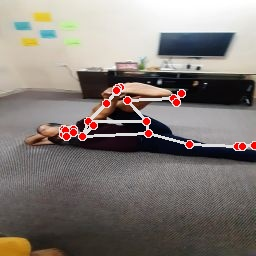

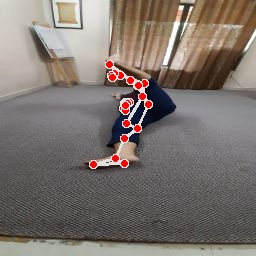

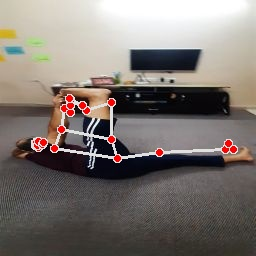

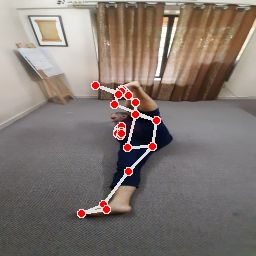

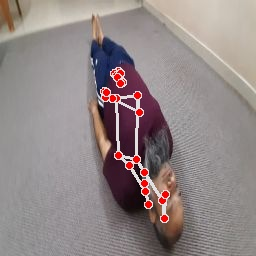

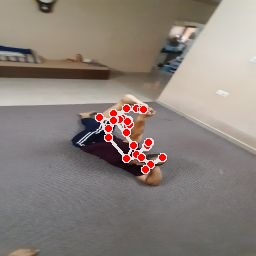

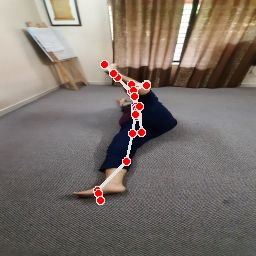

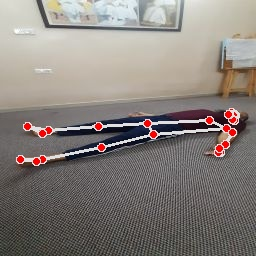

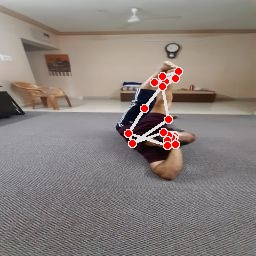

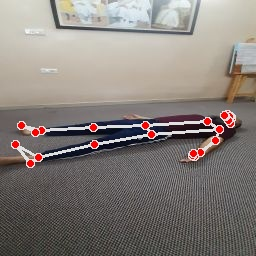

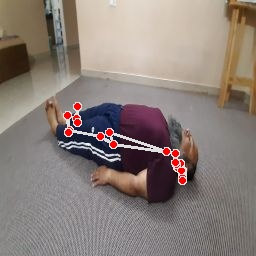

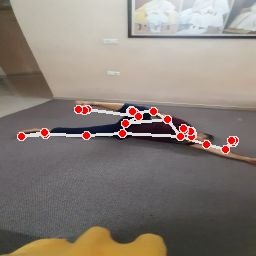

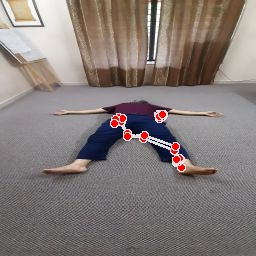

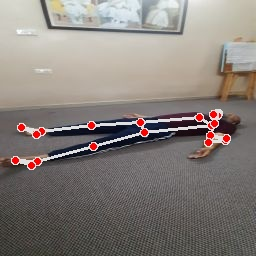

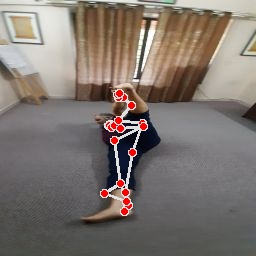

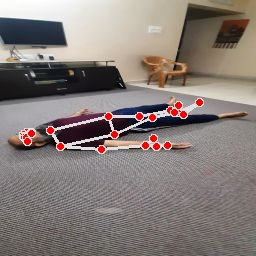

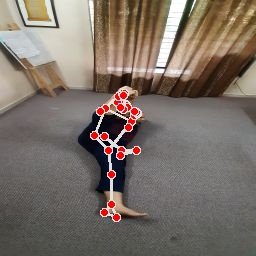

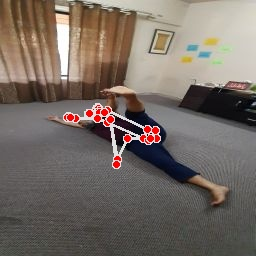

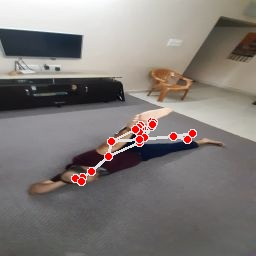

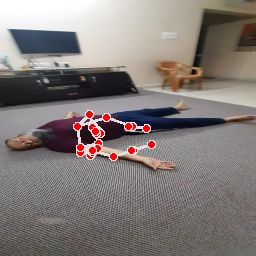

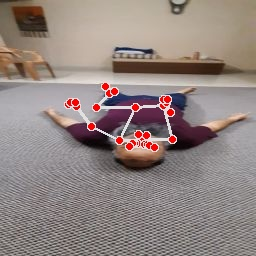

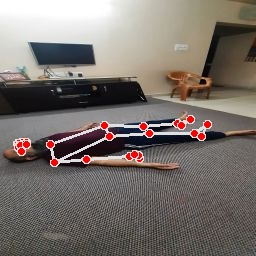

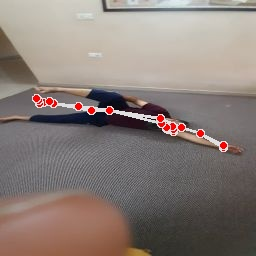

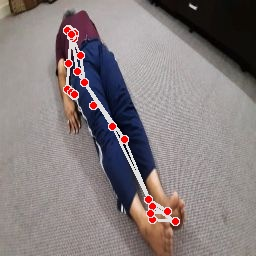

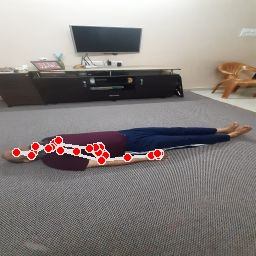

In [19]:
from IPython.display import Image, display

processed_images = os.listdir(processed_path)
for img in processed_images[:50]:  # Display first 5 images
    display(Image(filename=os.path.join(processed_path, img)))


In [20]:
with open(f"{results_path}/Anantasana Right Steps_Anantasana Right Step 1_20230317_072735.json") as f:
    print(json.load(f))


[{'x': 0.4708815813064575, 'y': 0.5152518153190613, 'z': 0.6932372450828552, 'visibility': 0.9842722415924072}, {'x': 0.4667544960975647, 'y': 0.4987667500972748, 'z': 0.7172417640686035, 'visibility': 0.9833899140357971}, {'x': 0.46635597944259644, 'y': 0.49147120118141174, 'z': 0.7171912789344788, 'visibility': 0.9802539348602295}, {'x': 0.46605485677719116, 'y': 0.48355984687805176, 'z': 0.7170340418815613, 'visibility': 0.9823424220085144}, {'x': 0.46968960762023926, 'y': 0.5131797790527344, 'z': 0.7229770421981812, 'visibility': 0.9857618808746338}, {'x': 0.4712935984134674, 'y': 0.5163576006889343, 'z': 0.722884476184845, 'visibility': 0.9865726232528687}, {'x': 0.473065048456192, 'y': 0.5192856788635254, 'z': 0.7227054238319397, 'visibility': 0.9888429045677185}, {'x': 0.47443410754203796, 'y': 0.46854984760284424, 'z': 0.7438717484474182, 'visibility': 0.9800947308540344}, {'x': 0.48217904567718506, 'y': 0.5110251307487488, 'z': 0.777154803276062, 'visibility': 0.98748886585235

In [22]:
import cv2
import os
import numpy as np

def preprocess_image(input_path, output_path):
    # Read the image
    img = cv2.imread(input_path)

    # Step 1: Denoise using Gaussian Blur
    denoised_img = cv2.GaussianBlur(img, (5, 5), 0)

    # Step 2: Enhance contrast using CLAHE
    lab = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    enhanced_img = cv2.merge((cl, a, b))
    enhanced_img = cv2.cvtColor(enhanced_img, cv2.COLOR_LAB2BGR)

    # Step 3: Sharpen the image
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened_img = cv2.filter2D(enhanced_img, -1, kernel)

    # Save the processed image
    cv2.imwrite(output_path, sharpened_img)



In [23]:
dataset_path = '/content/drive/MyDrive/yoga_postures'
processed_path = '/content/YogaPoseDetection/data/Processed'

# Ensure processed directory exists
os.makedirs(processed_path, exist_ok=True)

# Loop through the dataset and preprocess images
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".jpg"):
            input_path = os.path.join(root, file)
            output_path = os.path.join(processed_path, file)
            preprocess_image(input_path, output_path)


In [24]:
for root, dirs, files in os.walk(processed_path):
    for file in files:
        if file.endswith(".jpg"):
            input_path = os.path.join(root, file)
            save_image_path = os.path.join(processed_path, file)
            keypoints = detect_keypoints(input_path, save_image_path)

            if keypoints:
                pose_name = os.path.basename(os.path.dirname(root))
                step_name = os.path.basename(root)
                json_name = f"{pose_name}_{step_name}_{file.split('.')[0]}.json"
                save_keypoints(keypoints, os.path.join(results_path, json_name))


In [25]:
import cv2
import mediapipe as mp
import os

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

def detect_keypoints(image_path, save_image_path):
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect pose
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        # Draw the pose landmarks on the image
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        # Save the processed image
        cv2.imwrite(save_image_path, image)

        # Extract keypoints
        keypoints = []
        for landmark in results.pose_landmarks.landmark:
            keypoints.append({
                "x": landmark.x,
                "y": landmark.y,
                "z": landmark.z,
                "visibility": landmark.visibility
            })
        return keypoints
    else:
        return None


In [26]:
import cv2
import numpy as np
from albumentations import Compose, RandomRotate90, Flip, Transpose, RandomBrightnessContrast

# Define preprocessing pipeline
augmentations = Compose([
    RandomRotate90(),
    Flip(),
    Transpose(),
    RandomBrightnessContrast(),
])

def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Apply Gaussian Blur for noise reduction
    img_blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Resize to a fixed size (example: 224x224)
    img_resized = cv2.resize(img_blurred, (224, 224))

    # Apply augmentation
    augmented_image = augmentations(image=img_resized)['image']

    return augmented_image


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
<ipython-input-26-47672ce55f2a>:8: DeprecationWarning: Flip is deprecated. Consider using HorizontalFlip, VerticalFlip, RandomRotate90 or D4.
  Flip(),


In [27]:
import json

def save_keypoints(keypoints, output_path):
    # Save keypoints to JSON
    with open(output_path, 'w') as f:
        json.dump(keypoints, f)


In [28]:
import os

dataset_path = '/content/drive/MyDrive/yoga_postures'  # Your dataset path
processed_path = '/content/YogaPoseDetection/data/Processed'  # Path for processed images
results_path = "/content/YogaPoseDetection/results"  # Path for saving JSON results

# Ensure the results and processed directories exist
os.makedirs(processed_path, exist_ok=True)
os.makedirs(results_path, exist_ok=True)

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".jpg"):  # Only process .jpg files
            full_path = os.path.join(root, file)
            save_image_path = os.path.join(processed_path, file)

            # Preprocess the image (reduce noise, augment, resize)
            preprocessed_image = preprocess_image(full_path)
            cv2.imwrite(save_image_path, preprocessed_image)

            # Detect keypoints
            keypoints = detect_keypoints(save_image_path, save_image_path)

            if keypoints:
                # Save key points to JSON
                pose_name = os.path.basename(os.path.dirname(root))
                step_name = os.path.basename(root)
                json_name = f"{pose_name}_{step_name}_{file.split('.')[0]}.json"
                save_keypoints(keypoints, os.path.join(results_path, json_name))


In [29]:
import matplotlib.pyplot as plt

def visualize_keypoints(image_path, keypoints):
    # Read the image
    img = cv2.imread(image_path)

    # Loop over each keypoint and draw it
    for keypoint in keypoints:
        x = int(keypoint["x"] * img.shape[1])
        y = int(keypoint["y"] * img.shape[0])

        # Draw a circle for each keypoint
        cv2.circle(img, (x, y), 5, (0, 255, 0), -1)

    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show the image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


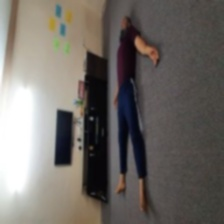

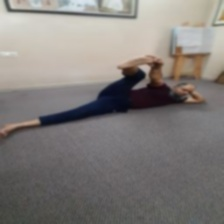

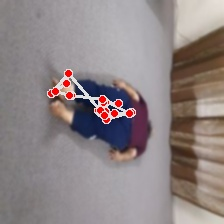

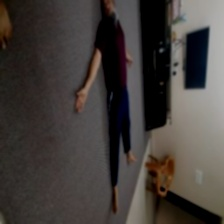

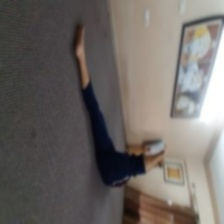

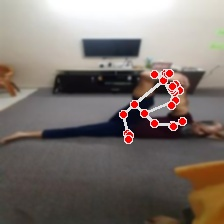

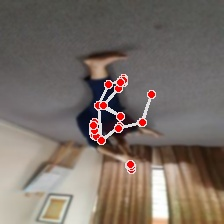

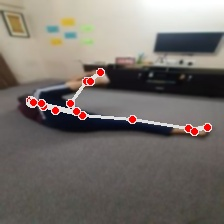

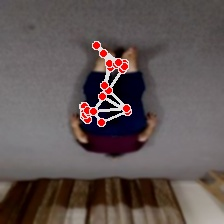

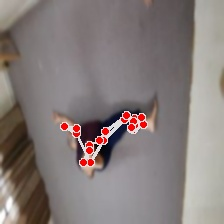

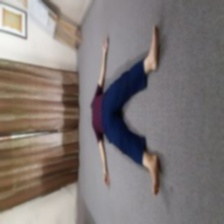

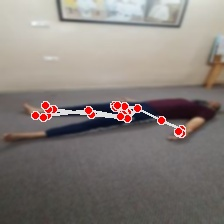

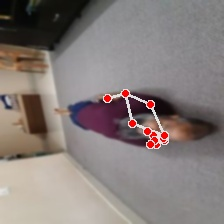

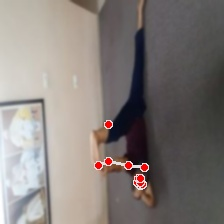

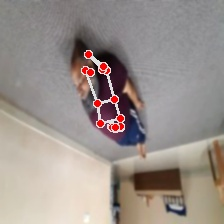

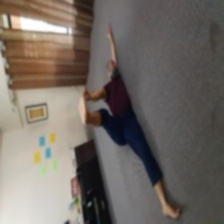

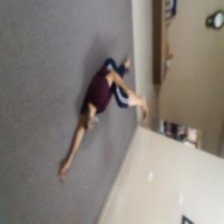

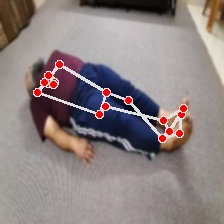

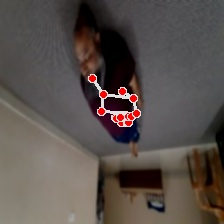

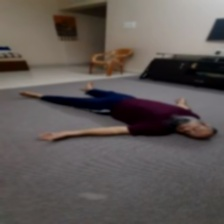

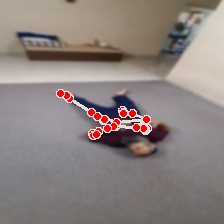

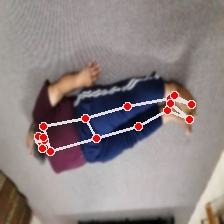

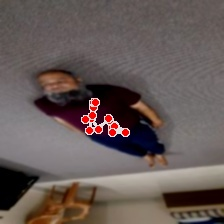

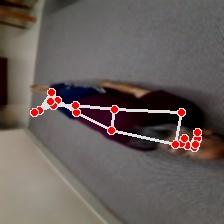

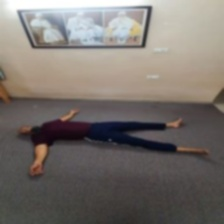

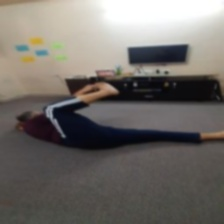

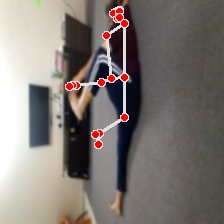

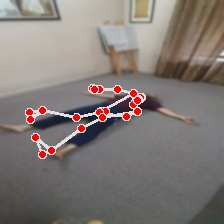

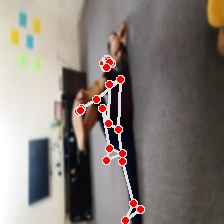

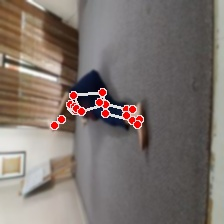

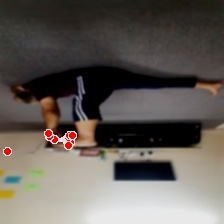

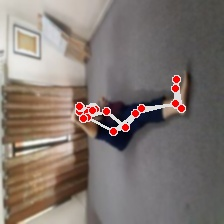

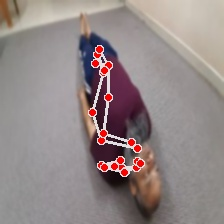

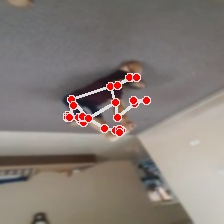

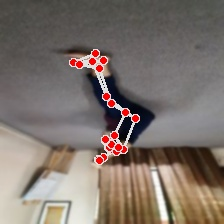

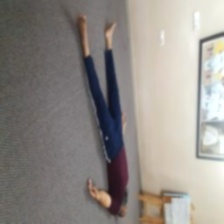

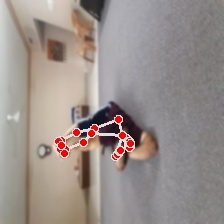

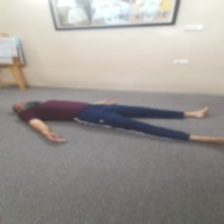

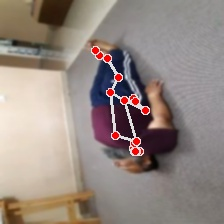

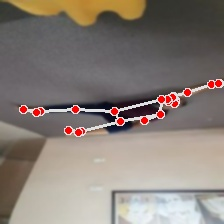

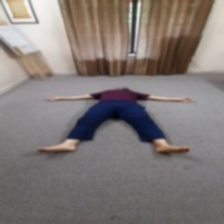

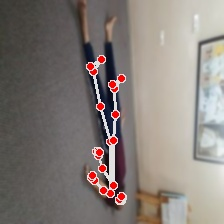

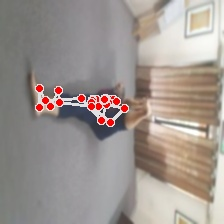

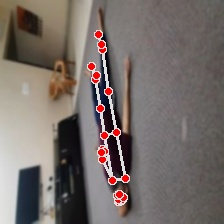

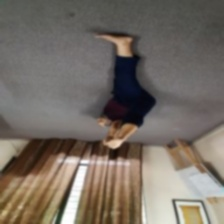

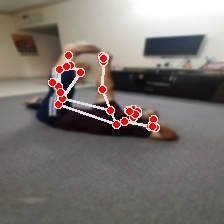

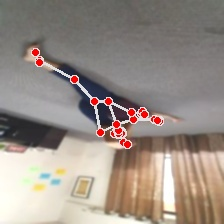

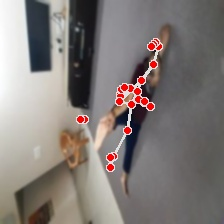

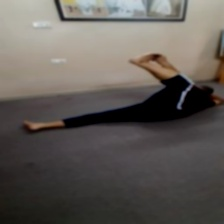

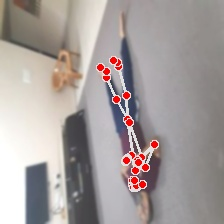

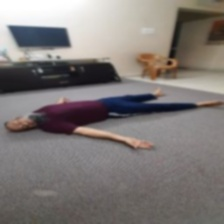

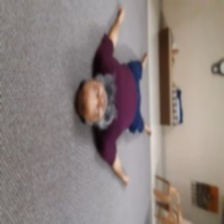

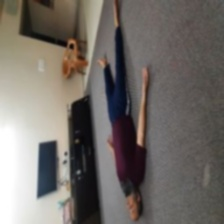

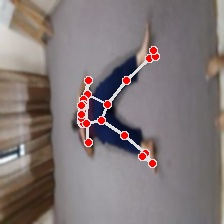

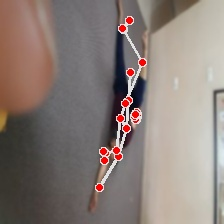

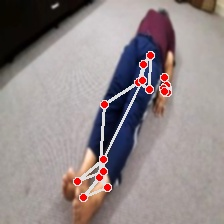

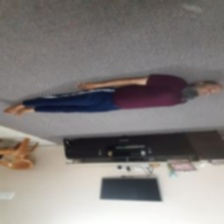

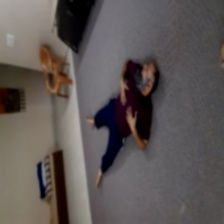

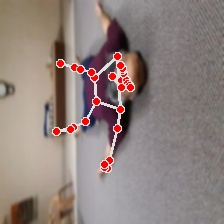

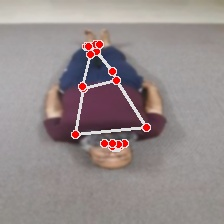

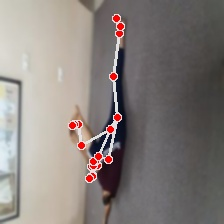

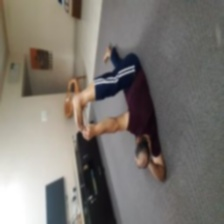

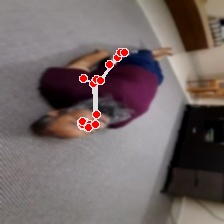

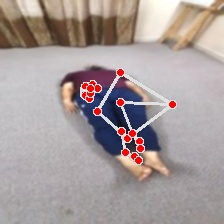

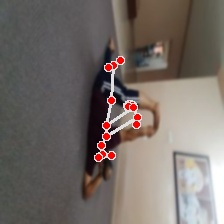

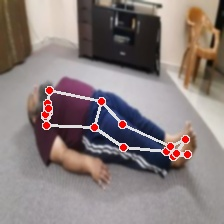

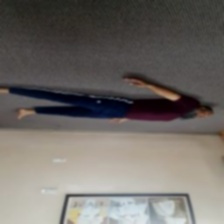

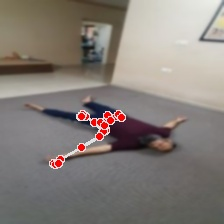

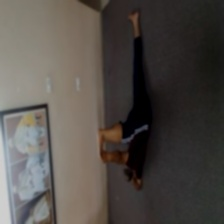

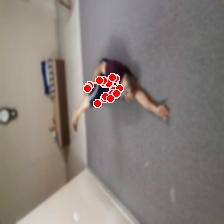

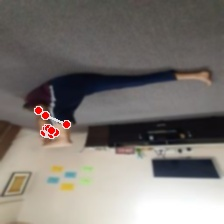

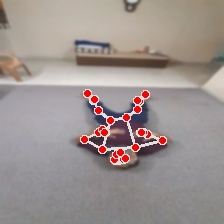

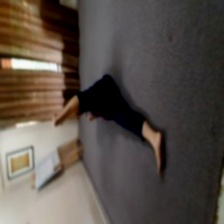

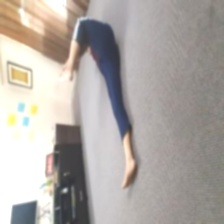

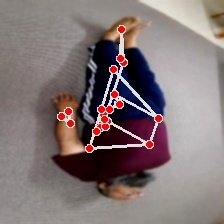

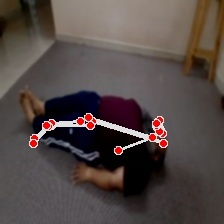

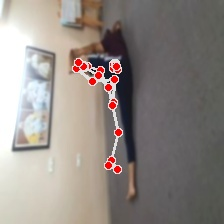

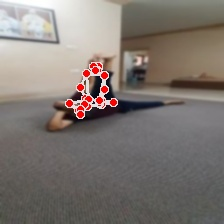

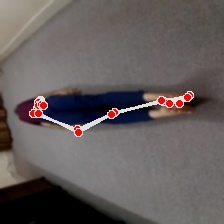

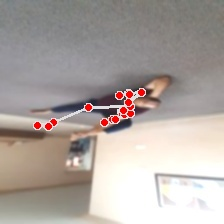

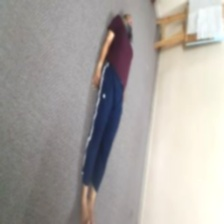

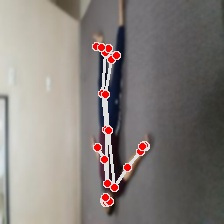

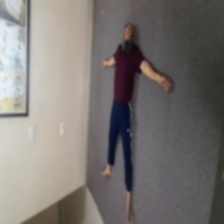

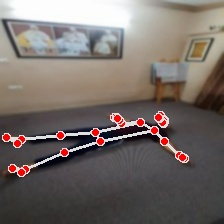

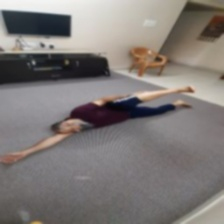

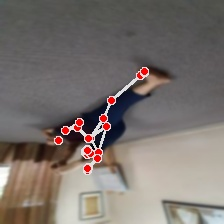

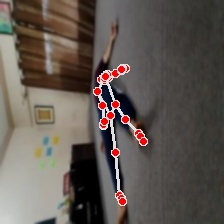

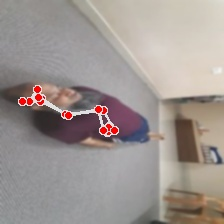

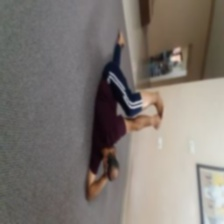

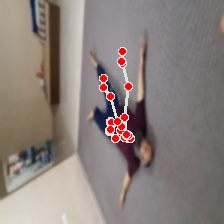

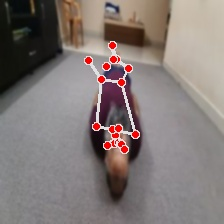

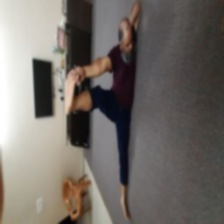

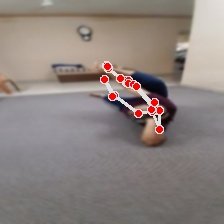

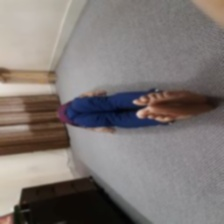

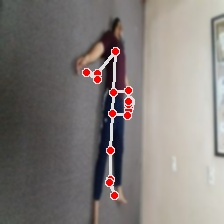

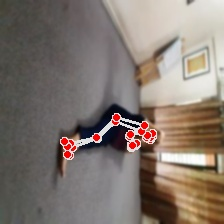

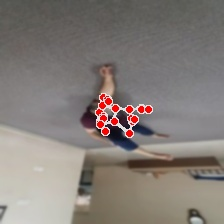

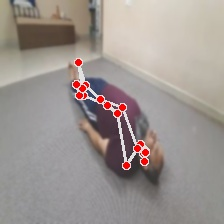

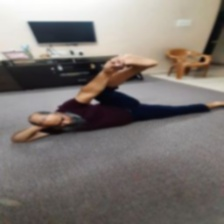

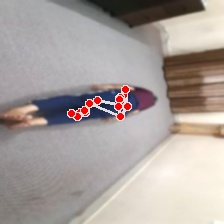

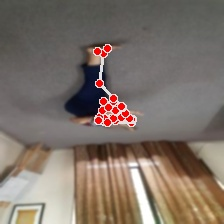

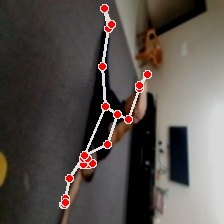

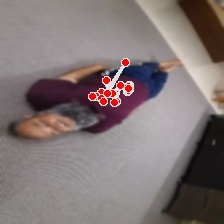

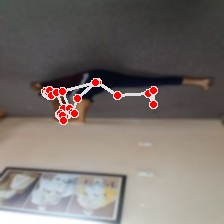

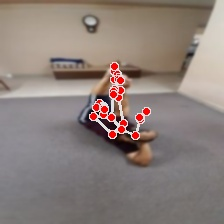

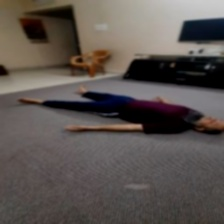

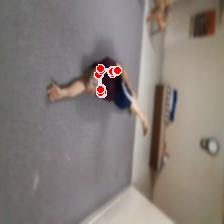

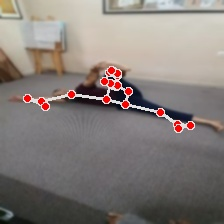

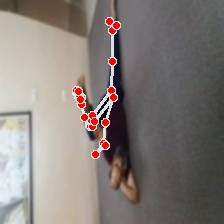

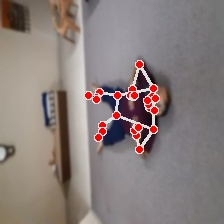

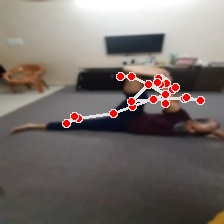

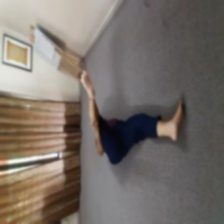

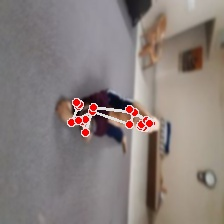

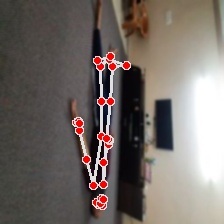

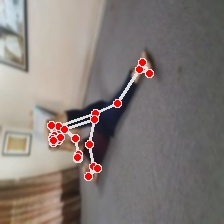

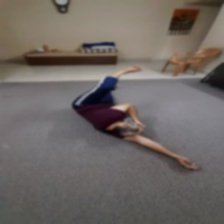

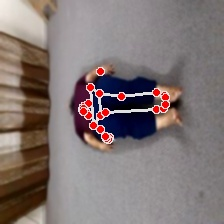

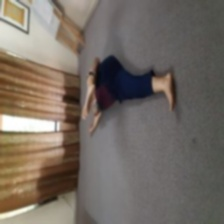

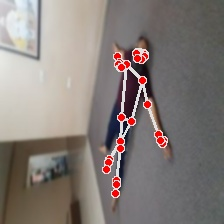

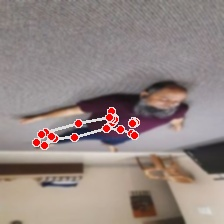

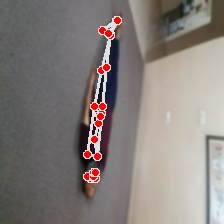

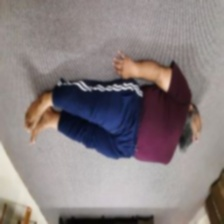

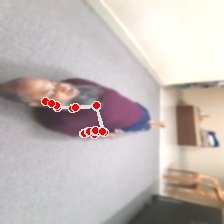

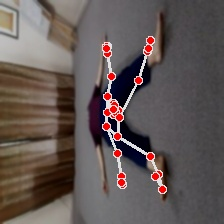

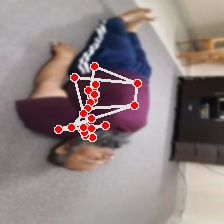

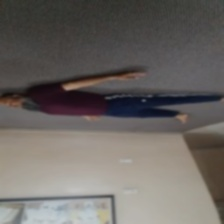

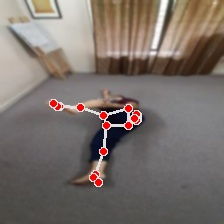

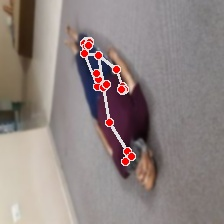

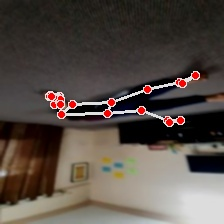

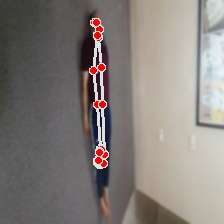

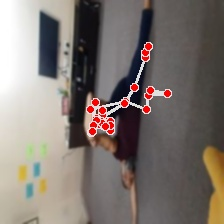

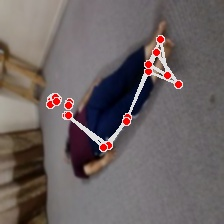

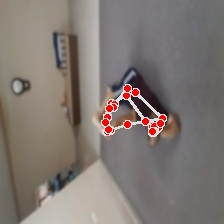

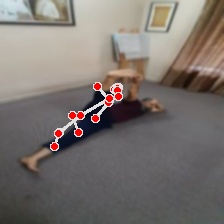

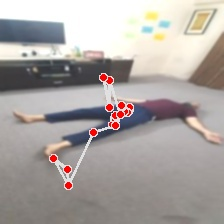

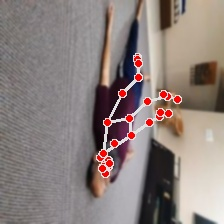

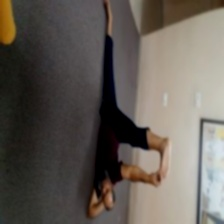

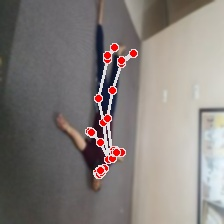

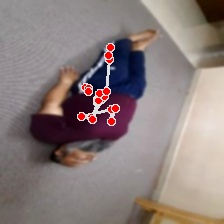

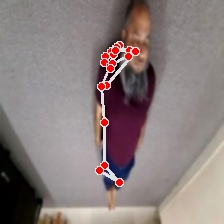

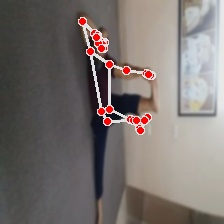

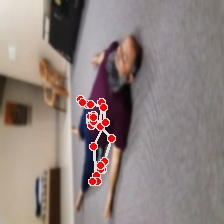

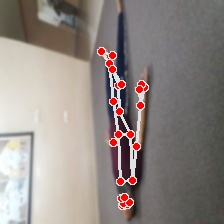

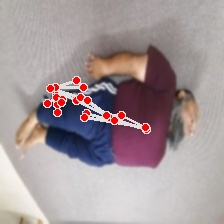

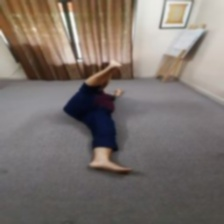

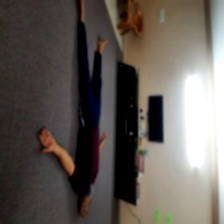

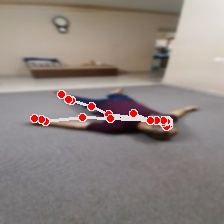

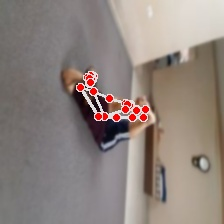

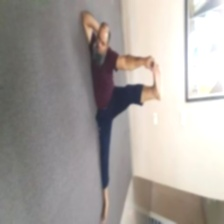

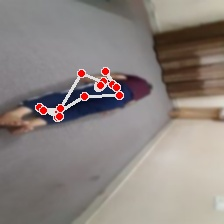

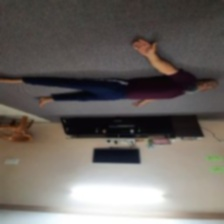

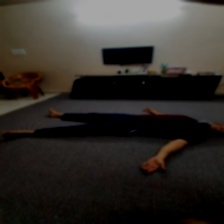

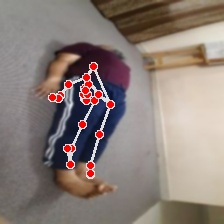

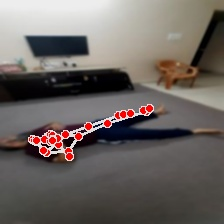

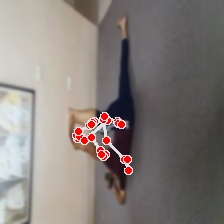

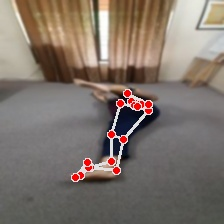

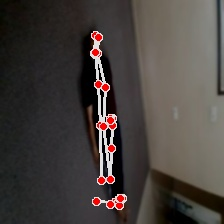

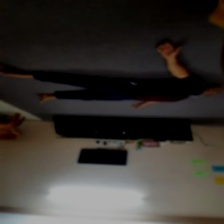

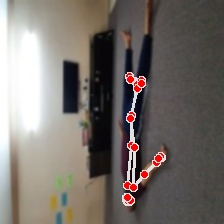

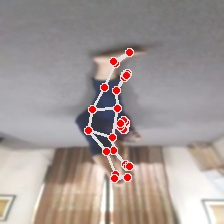

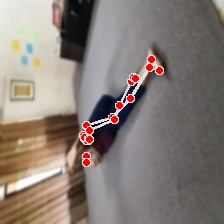

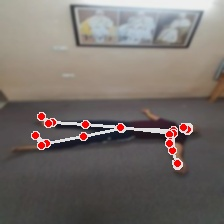

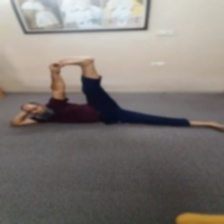

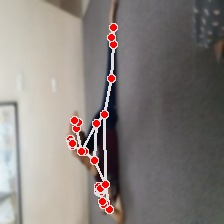

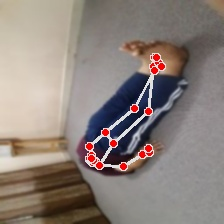

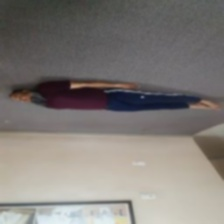

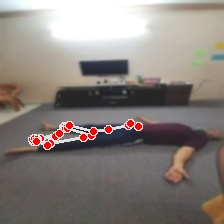

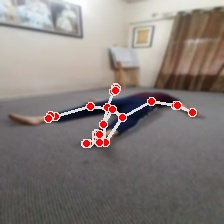

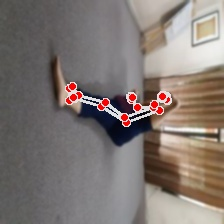

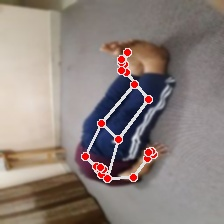

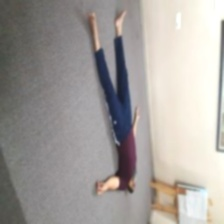

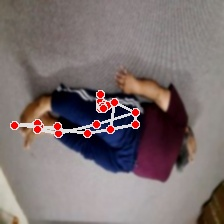

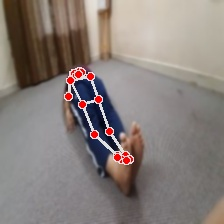

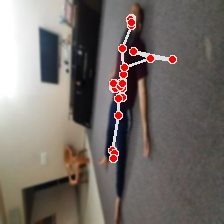

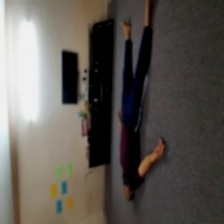

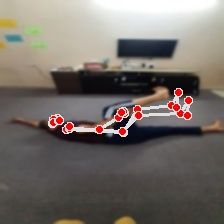

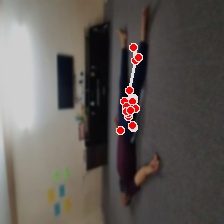

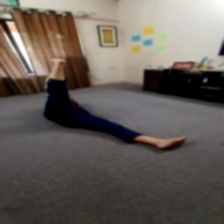

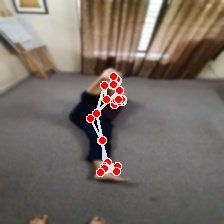

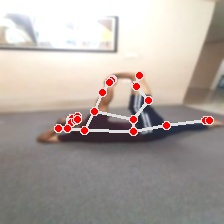

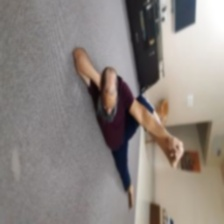

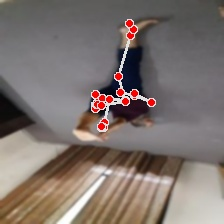

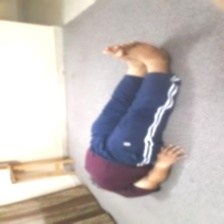

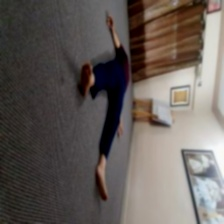

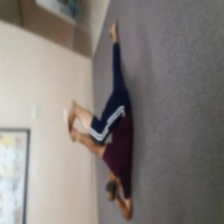

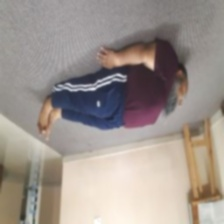

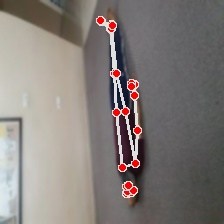

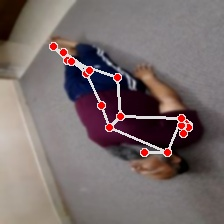

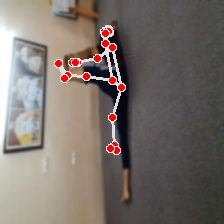

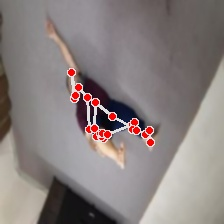

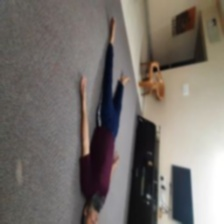

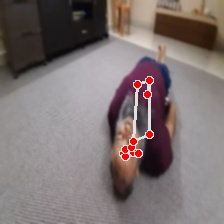

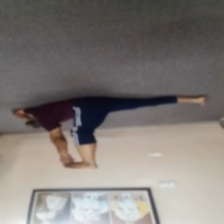

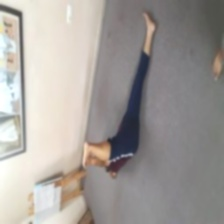

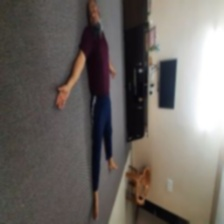

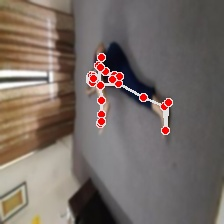

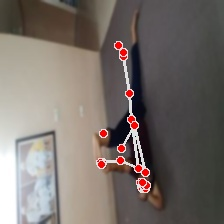

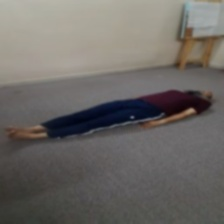

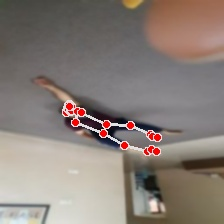

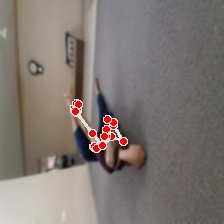

In [31]:
from IPython.display import Image, display

processed_images = os.listdir(processed_path)
for img in processed_images[:200]:  # Display first 5 images
    display(Image(filename=os.path.join(processed_path, img)))

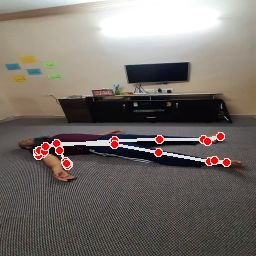

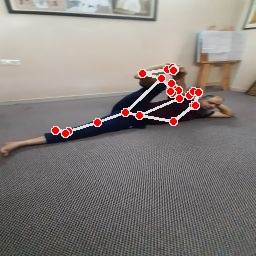

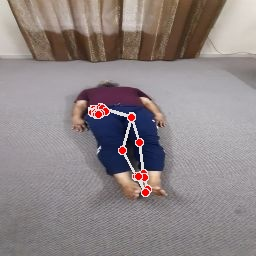

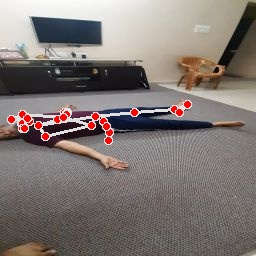

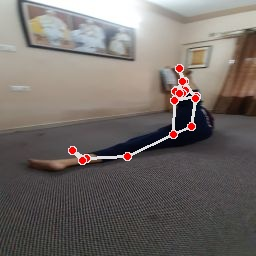

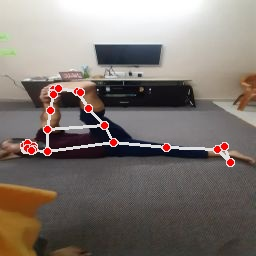

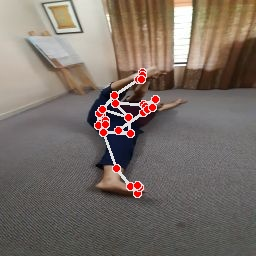

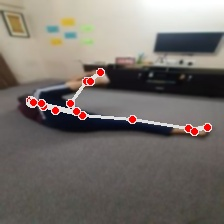

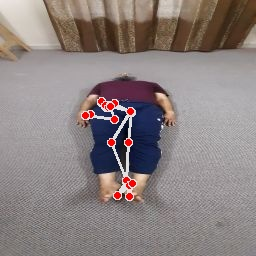

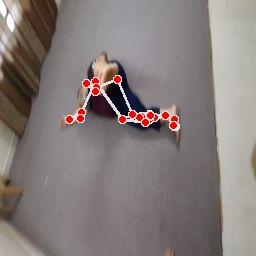

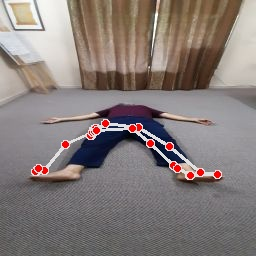

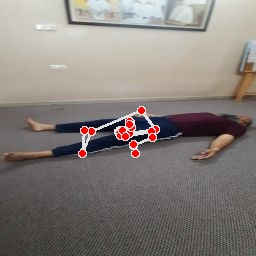

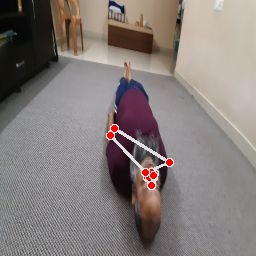

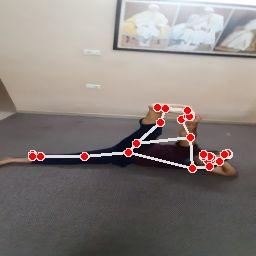

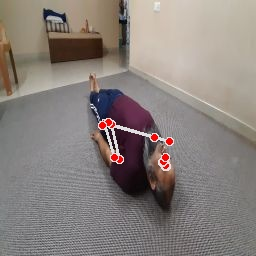

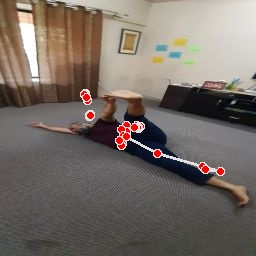

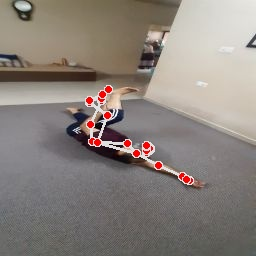

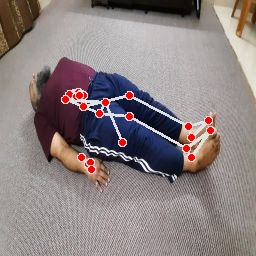

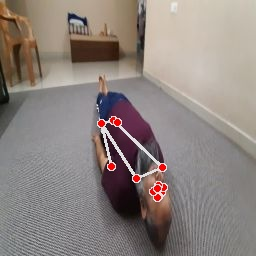

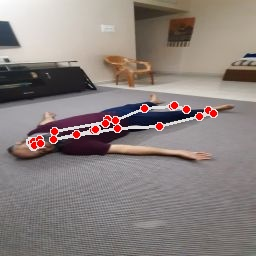

In [34]:
import os
import cv2
import numpy as np
import mediapipe as mp
import json
from IPython.display import Image, display

# Directories
dataset_path = '/content/drive/MyDrive/yoga_postures'  # Correct dataset path
processed_path = '/content/YogaPoseDetection/data/Processed'  # Path for processed images
results_path = "/content/YogaPoseDetection/results"  # Path to save results

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Sharpening filter to enhance clarity
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# Denoising function to reduce noise in images
def denoise_image(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Function to detect keypoints in the image
def detect_keypoints(image_path, processed_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for MediaPipe

    # Sharpen and denoise the image
    image_rgb = sharpen_image(image_rgb)
    image_rgb = denoise_image(image_rgb)

    # Process the image for pose detection
    results = pose.process(image_rgb)

    # Check if landmarks are detected
    if results.pose_landmarks:
        # Draw the landmarks on the image
        annotated_image = image.copy()
        mp.solutions.drawing_utils.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Save the processed image
        cv2.imwrite(processed_path, annotated_image)

        return results.pose_landmarks.landmark  # Extract landmarks from the list
    else:
        return None

# Function to save keypoints to JSON
def save_keypoints(keypoints, output_path):
    data = [{"x": kp.x, "y": kp.y, "z": kp.z, "visibility": kp.visibility} for kp in keypoints]
    with open(output_path, 'w') as f:
        json.dump(data, f)

# Process each image and save keypoints
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".jpg"):
            input_path = os.path.join(root, file)
            processed_image_path = os.path.join(processed_path, file)

            # Detect keypoints
            keypoints = detect_keypoints(input_path, processed_image_path)

            if keypoints:
                # Save the keypoints to JSON
                pose_name = os.path.basename(os.path.dirname(root))
                step_name = os.path.basename(root)
                json_name = f"{pose_name}_{step_name}_{file.split('.')[0]}.json"
                save_keypoints(keypoints, os.path.join(results_path, json_name))

# After processing all images, display the processed images
processed_images = os.listdir(processed_path)
for img in processed_images[:20]:  # Display first 5 images
    display(Image(filename=os.path.join(processed_path, img)))
